# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
print(weather_api_key)

274218027aab9ac1fbc7a557f9a07770


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #pause for 1 sec
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hailar
City not found. Skipping...
Processing Record 2 of Set 1 | angaur state
City not found. Skipping...
Processing Record 3 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 4 of Set 1 | nemuro
City not found. Skipping...
Processing Record 5 of Set 1 | celestun
City not found. Skipping...
Processing Record 6 of Set 1 | moyynkum
City not found. Skipping...
Processing Record 7 of Set 1 | nelson bay
City not found. Skipping...
Processing Record 8 of Set 1 | afaahiti
City not found. Skipping...
Processing Record 9 of Set 1 | qaqortoq
City not found. Skipping...
Processing Record 10 of Set 1 | grytviken
City not found. Skipping...
Processing Record 11 of Set 1 | batamshinskiy
City not found. Skipping...
Processing Record 12 of Set 1 | invercargill
City not found. Skipping...
Processing Record 13 of Set 1 | laguna
City not found. Skipping...
Processing Record 14 of Set 1 | dzila

City not found. Skipping...
Processing Record 18 of Set 3 | heiligenhafen
City not found. Skipping...
Processing Record 19 of Set 3 | arno
City not found. Skipping...
Processing Record 20 of Set 3 | khandyga
City not found. Skipping...
Processing Record 21 of Set 3 | vanino
City not found. Skipping...
Processing Record 22 of Set 3 | north battleford
City not found. Skipping...
Processing Record 23 of Set 3 | belyayevka
City not found. Skipping...
Processing Record 24 of Set 3 | yangjiang
City not found. Skipping...
Processing Record 25 of Set 3 | waitangi
City not found. Skipping...
Processing Record 26 of Set 3 | vila velha
City not found. Skipping...
Processing Record 27 of Set 3 | puerto ayora
City not found. Skipping...
Processing Record 28 of Set 3 | college
City not found. Skipping...
Processing Record 29 of Set 3 | puerto baquerizo moreno
City not found. Skipping...
Processing Record 30 of Set 3 | trapani
City not found. Skipping...
Processing Record 31 of Set 3 | geraldton
City

City not found. Skipping...
Processing Record 35 of Set 5 | constantia
City not found. Skipping...
Processing Record 36 of Set 5 | puerto armuelles
City not found. Skipping...
Processing Record 37 of Set 5 | happy valley-goose bay
City not found. Skipping...
Processing Record 38 of Set 5 | bubaque
City not found. Skipping...
Processing Record 39 of Set 5 | klyuchi
City not found. Skipping...
Processing Record 40 of Set 5 | palmer
City not found. Skipping...
Processing Record 41 of Set 5 | nijar
City not found. Skipping...
Processing Record 42 of Set 5 | pericos
City not found. Skipping...
Processing Record 43 of Set 5 | nizhneangarsk
City not found. Skipping...
Processing Record 44 of Set 5 | chonchi
City not found. Skipping...
Processing Record 45 of Set 5 | zuunmod
City not found. Skipping...
Processing Record 46 of Set 5 | kyren
City not found. Skipping...
Processing Record 47 of Set 5 | kailua-kona
City not found. Skipping...
Processing Record 48 of Set 5 | holualoa
City not found.

Processing Record 12 of Set 8 | burang
Processing Record 13 of Set 8 | brookings
Processing Record 14 of Set 8 | obudu
Processing Record 15 of Set 8 | yantarnyy
Processing Record 16 of Set 8 | halberstadt
Processing Record 17 of Set 8 | uturoa
Processing Record 18 of Set 8 | karasburg
Processing Record 19 of Set 8 | dila
Processing Record 20 of Set 8 | taro
Processing Record 21 of Set 8 | usogorsk
Processing Record 22 of Set 8 | guardo
Processing Record 23 of Set 8 | qarazhal
Processing Record 24 of Set 8 | bafq
Processing Record 25 of Set 8 | goz beida
Processing Record 26 of Set 8 | mumford
Processing Record 27 of Set 8 | tomohon
Processing Record 28 of Set 8 | parabel'
Processing Record 29 of Set 8 | lucea
Processing Record 30 of Set 8 | tazovsky
Processing Record 31 of Set 8 | kristiansund
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | belabo
Processing Record 34 of Set 8 | okola
Processing Record 35 of Set 8 | nikolayevsk-on-amure
Processing Record 36

Processing Record 4 of Set 12 | kamiiso
Processing Record 5 of Set 12 | fort drum
Processing Record 6 of Set 12 | carbonear
Processing Record 7 of Set 12 | san marcos de colon
Processing Record 8 of Set 12 | shannon
Processing Record 9 of Set 12 | aral
Processing Record 10 of Set 12 | sungai raya
Processing Record 11 of Set 12 | quimili
Processing Record 12 of Set 12 | howrah
Processing Record 13 of Set 12 | deogarh
Processing Record 14 of Set 12 | necochea
Processing Record 15 of Set 12 | rundu
Processing Record 16 of Set 12 | chernyshevskiy
Processing Record 17 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 18 of Set 12 | nouadhibou
Processing Record 19 of Set 12 | los frentones
Processing Record 20 of Set 12 | kumbo
Processing Record 21 of Set 12 | acarau
Processing Record 22 of Set 12 | harper
Processing Record 23 of Set 12 | guymon
Processing Record 24 of Set 12 | inhambane
Processing Record 25 of Set 12 | plettenberg bay
Processing Record 26 of Set 12 | seven 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [7]:
city_data_df.count()

City          243
Lat           243
Lng           243
Max Temp      243
Humidity      243
Cloudiness    243
Wind Speed    243
Country       243
Date          243
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chibougamau,49.9168,-74.3659,60.42,72,0,3.44,CA,1686634088
1,kuala belait,4.5833,114.1833,89.76,62,38,7.67,BN,1686634089
2,kralendijk,12.1500,-68.2667,82.38,83,20,16.11,BQ,1686634090
3,ararangua,-28.9347,-49.4858,46.54,81,92,6.69,BR,1686634091
4,prado,-17.3411,-39.2208,72.00,92,1,5.28,BR,1686634092


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chibougamau,49.9168,-74.3659,60.42,72,0,3.44,CA,1686634088
1,kuala belait,4.5833,114.1833,89.76,62,38,7.67,BN,1686634089
2,kralendijk,12.1500,-68.2667,82.38,83,20,16.11,BQ,1686634090
3,ararangua,-28.9347,-49.4858,46.54,81,92,6.69,BR,1686634091
4,prado,-17.3411,-39.2208,72.00,92,1,5.28,BR,1686634092


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

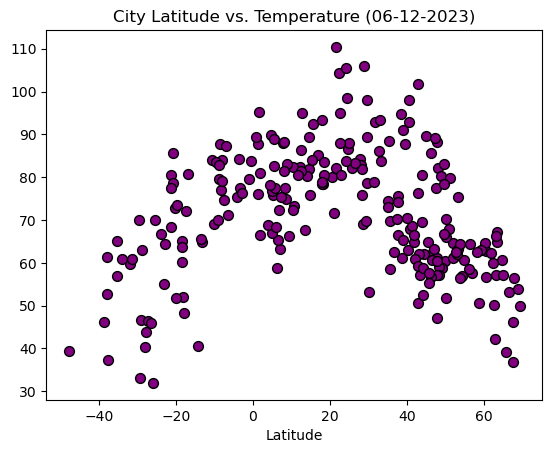

In [15]:
import datetime

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="purple",
    edgecolor="black",
    linewidths=1,
    marker="o",  # Fix the typo here
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % datetime.date.today().strftime("%m-%d-%Y"))  
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

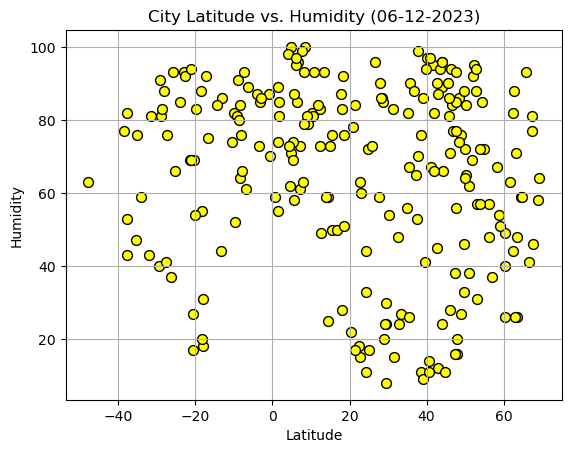

In [16]:
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="yellow",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % datetime.date.today().strftime("%m-%d-%Y"))  
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

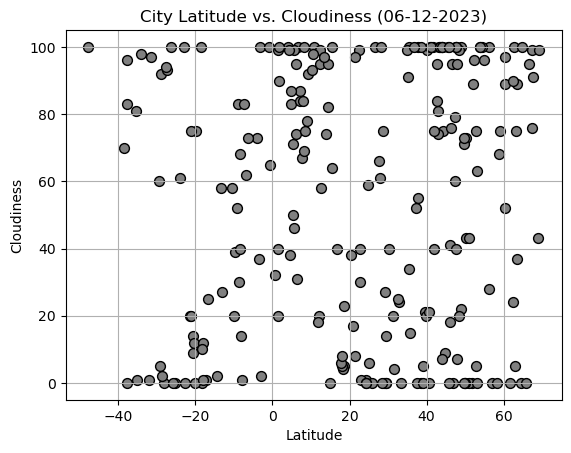

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % datetime.date.today().strftime("%m-%d-%Y"))   
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

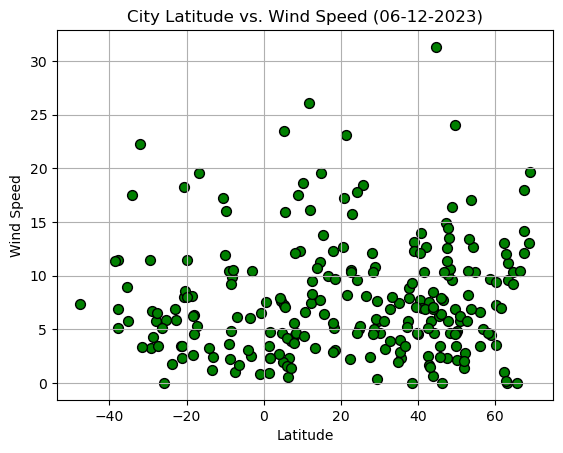

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="green",
    edgecolor="black",
    linewidths=1,
    marker="o",  # Fix the typo here
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % datetime.date.today().strftime("%m-%d-%Y"))  
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    # Compute linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"the r-value is: {rvalue*2}")
    plt.show() 

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chibougamau,49.9168,-74.3659,60.42,72,0,3.44,CA,1686634088
1,kuala belait,4.5833,114.1833,89.76,62,38,7.67,BN,1686634089
2,kralendijk,12.1500,-68.2667,82.38,83,20,16.11,BQ,1686634090
5,nizhnesortymskiy,62.4397,71.7603,50.25,44,24,13.00,RU,1686634094
6,al jawf,29.5000,38.7500,78.57,30,0,0.34,SA,1686634095


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ararangua,-28.9347,-49.4858,46.54,81,92,6.69,BR,1686634091
4,prado,-17.3411,-39.2208,72.00,92,1,5.28,BR,1686634092
14,mount isa,-20.7333,139.5000,85.77,17,14,8.05,AU,1686634104
18,gizo,-8.1030,156.8419,83.91,76,14,9.91,SB,1686634109
20,hithadhoo,-0.6000,73.0833,83.89,70,65,6.53,MV,1686634111


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: -1.141012166556544


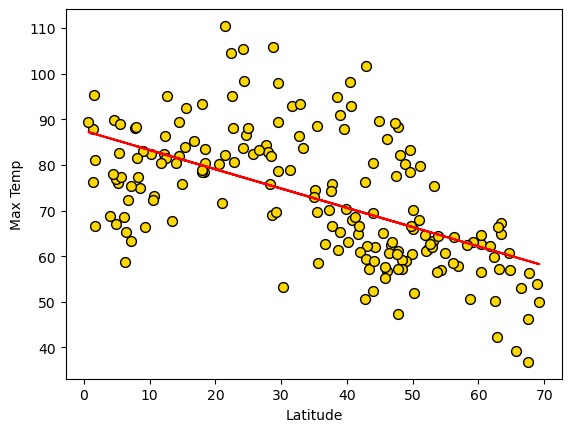

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10), "gold")

the r-value is: 1.359053001168767


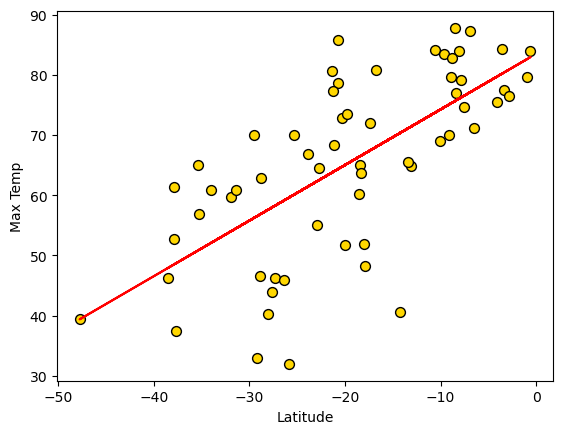

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35), "gold")

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a r value of -1.14 which means that there is a negative strong correlation. In the southern hemisphere is is a strong r value of 1.35, meaning that there is a strong positive correlation due to the season. Meaning there is a strong relationship between latitude and max temp.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: -0.33407403011245523


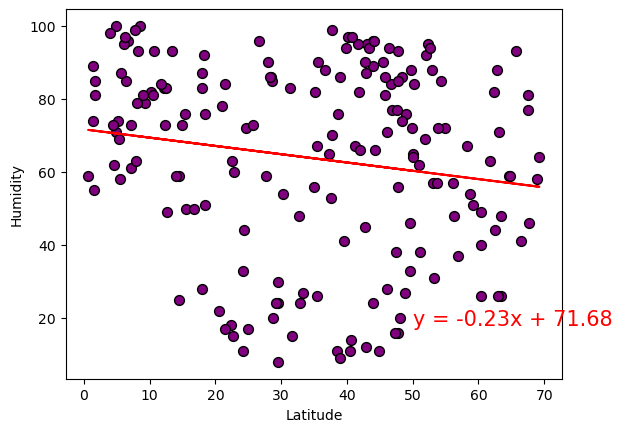

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 18), "purple")

the r-value is: 0.44726445935766745


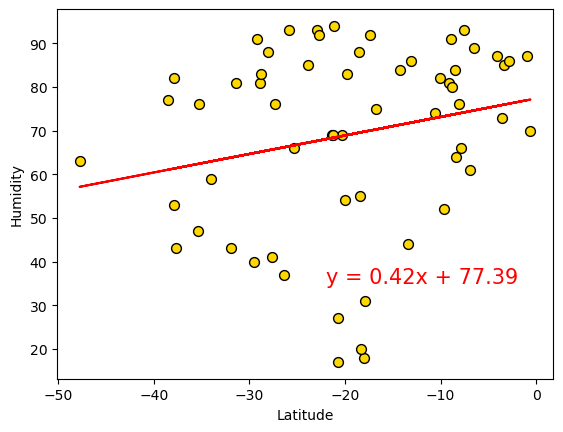

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-22, 35), "gold")

**Discussion about the linear relationship:**
In the northern hemisphere, is a weak negative correlation with the r value being -0.33. In the southern hemisphere, there is a weak positive correlation with the r value being 0.44, meaning there is little to no relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: -0.06233170120212346


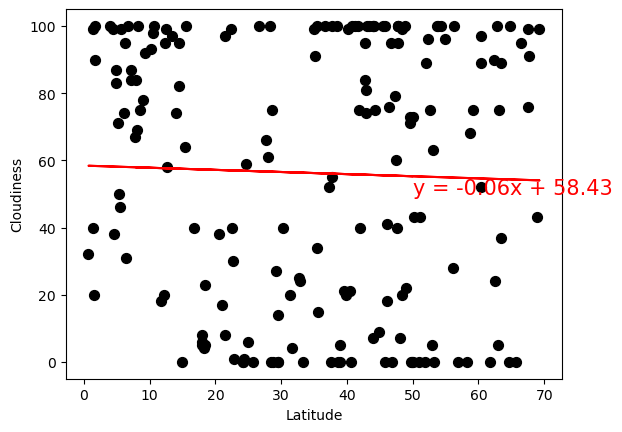

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (50, 50), "black")

the r-value is: -0.13772998857511232


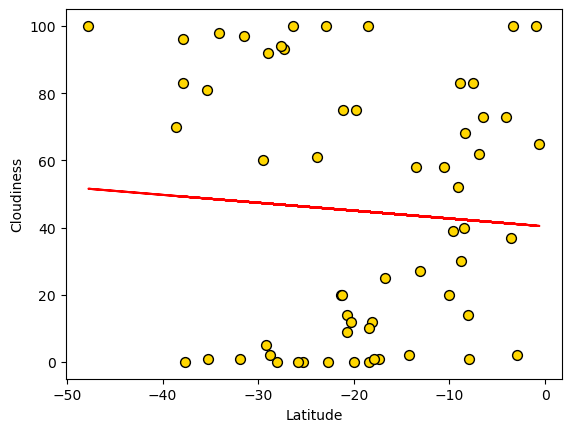

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 20), "gold")

**Discussion about the linear relationship:** Both values are weak and negatively correlated, concluding that latitude and cloudiness do not share a strong relationship or any.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.0716996355919387


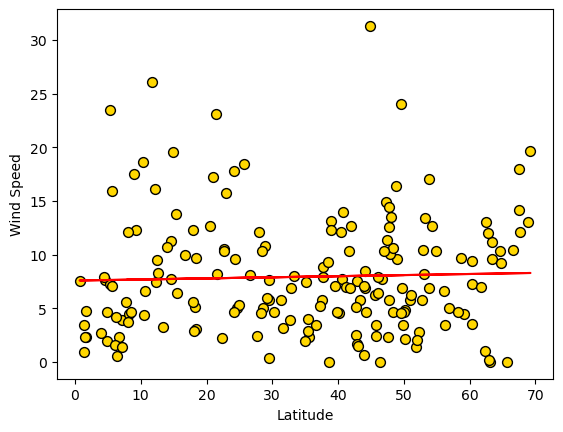

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (50, 35), "gold")

the r-value is: -0.2898993956152992


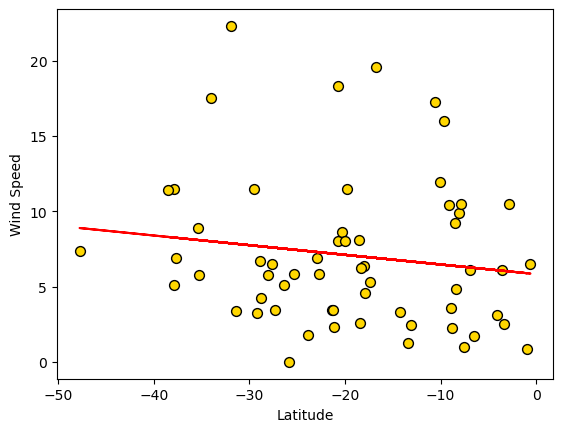

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (30, 15), "gold")

**Discussion about the linear relationship:** 
Both demonstrate very low r -values, concluding that wind speed and latitude do not share a strong relationship